## Data Engineering Platform For Analytics

### Data Cleaning

**Importing necessary libraries**

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import mysql.connector as mysql
import warnings
import pymysql
from pandas.io import sql


warnings.filterwarnings("ignore")

#### Name Basics

In [2]:
name_basics_0 = pd.read_csv('/Users/ali/Documents/University of Chicago/Data Engineering Platform for Analytics/Project/Datasets/name.basics.tsv', sep='\t', 
                 low_memory = False, skipinitialspace = True)

In [3]:
name_basics_0.head()

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
0,nm0000001,Fred Astaire,1899,1987,"soundtrack,actor,miscellaneous","tt0031983,tt0053137,tt0050419,tt0072308"
1,nm0000002,Lauren Bacall,1924,2014,"actress,soundtrack","tt0038355,tt0117057,tt0037382,tt0071877"
2,nm0000003,Brigitte Bardot,1934,\N,"actress,soundtrack,music_department","tt0049189,tt0054452,tt0056404,tt0057345"
3,nm0000004,John Belushi,1949,1982,"actor,soundtrack,writer","tt0078723,tt0077975,tt0080455,tt0072562"
4,nm0000005,Ingmar Bergman,1918,2007,"writer,director,actor","tt0050976,tt0083922,tt0060827,tt0050986"


In [4]:
name_basics_0.shape

(11362755, 6)

*The number of rows exceed the capacity of excel. Therefore we would be unable to export to excel and process through mySQL*

In [5]:
name_clean = name_basics_0

**Using str.split() operations to split strings into all of its components. This will allows us to examine each value for our required joins**

In [6]:
name_clean[['Profession_1', 'Profession_2', 'Profession_3']] = name_clean['primaryProfession'].str.split(',', expand=True)

In [7]:
name_clean[['Title_1', 'Title_2', 'Title_3', 'Title_4', 'Title_5', 'Title_6']] = name_clean['knownForTitles'].str.split(',', expand=True)

In [8]:
name_clean[['Profession_1', 'Profession_2', 'Profession_3', 'Title_1', 'Title_2', 'Title_3', 'Title_4', 'Title_5', 'Title_6']].head(10)

,Profession_1,Profession_2,Profession_3,Title_1,Title_2,Title_3,Title_4,Title_5,Title_6
0,soundtrack,actor,miscellaneous,tt0031983,tt0053137,tt0050419,tt0072308,None,None
1,actress,soundtrack,None,tt0038355,tt0117057,tt0037382,tt0071877,None,None
2,actress,soundtrack,music_department,tt0049189,tt0054452,tt0056404,tt0057345,None,None
3,actor,soundtrack,writer,tt0078723,tt0077975,tt0080455,tt0072562,None,None
4,writer,director,actor,tt0050976,tt0083922,tt0060827,tt0050986,None,None
5,actress,soundtrack,producer,tt0034583,tt0077711,tt0036855,tt0038109,None,None
6,actor,soundtrack,producer,tt0033870,tt0043265,tt0034583,tt0042593,None,None
7,actor,soundtrack,director,tt0078788,tt0068646,tt0070849,tt0047296,None,None
8,actor,soundtrack,producer,tt0087803,tt0057877,tt0059749,tt0061184,None,None
9,actor,soundtrack,director,tt0042041,tt0029870,tt0031867,tt0035575,None,None


**Examining null values in the dataframe columns**

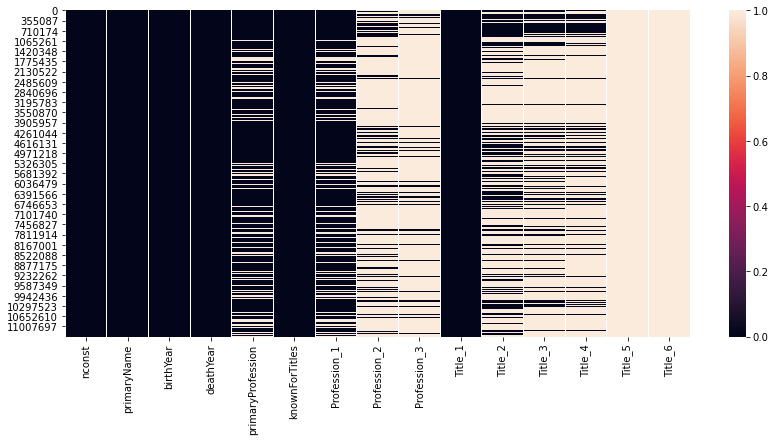

In [9]:
plt.figure(figsize=(14,6))
sns.heatmap(name_clean.isnull())
plt.show()

*As anticipated, there are no null values in Title_1 but they progressively increase for each new column containing title*

In [10]:
name_clean = name_clean.drop(columns=['primaryProfession', 'knownForTitles'])

In [11]:
name_basics = name_clean 
name_basics.head()

,nconst,primaryName,birthYear,deathYear,Profession_1,Profession_2,Profession_3,Title_1,Title_2,Title_3,Title_4,Title_5,Title_6
0,nm0000001,Fred Astaire,1899,1987,soundtrack,actor,miscellaneous,tt0031983,tt0053137,tt0050419,tt0072308,None,None
1,nm0000002,Lauren Bacall,1924,2014,actress,soundtrack,None,tt0038355,tt0117057,tt0037382,tt0071877,None,None
2,nm0000003,Brigitte Bardot,1934,\N,actress,soundtrack,music_department,tt0049189,tt0054452,tt0056404,tt0057345,None,None
3,nm0000004,John Belushi,1949,1982,actor,soundtrack,writer,tt0078723,tt0077975,tt0080455,tt0072562,None,None
4,nm0000005,Ingmar Bergman,1918,2007,writer,director,actor,tt0050976,tt0083922,tt0060827,tt0050986,None,None


#### Title Ratings 

In [17]:
title_ratings = pd.read_csv('/Users/ali/Documents/University of Chicago/Data Engineering Platform for Analytics/Project/Datasets/title.ratings.tsv', sep='\t', 
                 low_memory = False, skipinitialspace = True)

In [18]:
title_ratings.head()

,tconst,averageRating,numVotes
0,tt0000001,5.7,1834
1,tt0000002,6.0,236
2,tt0000003,6.5,1594
3,tt0000004,6.0,153
4,tt0000005,6.2,2410


**Looking at the length of values in the column tconst** 

In [19]:
title_ratings.tconst.str.len().value_counts()

9     1075838
10     125198
Name: tconst, dtype: int64

**Looking at total number of distinct values**

In [20]:
li = list(title_ratings.tconst.value_counts())
print(len(li))

1201036


*The column tconst acts as a primary key for title_ratings and we do not need to split it further*

#### Title Basics

In [21]:
title_basics_0 = pd.read_csv('/Users/ali/Documents/University of Chicago/Data Engineering Platform for Analytics/Project/Datasets/title.basics.tsv', sep='\t', 
                 low_memory = False, skipinitialspace = True)

In [23]:
title_basics_0.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"


In [26]:
title_basics_0.shape

(8419764, 9)

In [27]:
title_basics = title_basics_0

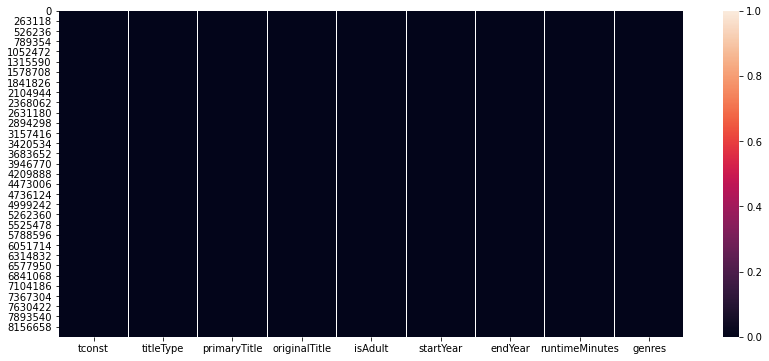

In [28]:
plt.figure(figsize=(14,6))
sns.heatmap(title_basics.isnull())
plt.show()

#### Title Principals